# QC on WaferGen PCR SmartChip


## Get Data

In [49]:
import pandas, os, glob
import logging
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline
FORMAT = "%(asctime)s:%(levelname)s:%(message)s"
logging.basicConfig(format=FORMAT)
LOG= logging.getLogger()
LOG.setLevel(logging.DEBUG)

dire = r'/home/b3053674/Documents/WaferGen/2D_TGFb'
ncl = os.path.join(dire, 'GSS2242_NCGeneSet')
ecm = os.path.join(dire, 'GSS2266_ECMGeneSet')





def parse_data(data1, data2, labels1, labels2):
    """
    Parse smart-chip PCR data
    
    args:
        data1: data from chip 1 (NCL or ECM)
    
        data2 Data from chip2 (NCL or ECM)
        
        labels1: labels for chips (NCL or ECM)
        
        labels2: Condition labels (Neonatal, IR and Adult)
    
    """

    ## construct python dict for data
    dct = {}
    for i in range(len(labels1)):
        dct[labels1[i]] = {}

    for i in range(len(labels1)):
        for j in range(len(labels2)):
            if labels1[i]=='Chip1NCL':
                dct[labels1[i]][labels2[j]] = pandas.read_csv(data1[j], sep='\t')
            elif labels1[i]=='Chip2ECM':
                dct[labels1[i]][labels2[j]] = pandas.read_csv(data2[j], sep='\t')

    ## remove unwanted columns
    columns = ['Assay', 'Sample','Ct']
    dct2 = {}
    for chip in dct:
        dct2[chip] = {}
        for treatment in dct[chip]:
            dct2[chip][treatment] = dct[chip][treatment][columns]
            
    ## parse data into one pandas dataframe

    df_dct = {}
    for chip in dct2:
        df_dct[chip] = pandas.concat(dct2[chip])
        
    return pandas.concat(df_dct)

    
ncl_raw_data = sorted(glob.glob(os.path.join(ncl, '*WellData*')  )  )
ecm_raw_data = sorted(glob.glob(os.path.join(ecm, '*WellData*')  )  )

labels1 = ['Chip1NCL', 'Chip2ECM']
labels2 = ['Neonatal', 'IR', 'Adult']
    
    
LOG.info('Parsing data from file into python ')
df = parse_data(ncl_raw_data, ecm_raw_data, labels1, labels2)

2017-07-12 13:55:59,017:INFO:Parsing data from file into python 


2017-07-12 13:57:29,987:DEBUG:DataFrame now looks like this:
                   Assay     Sample        Ct
Chip1NCL Adult 0    ABL1  Tgfb_48_4  23.98787
               1    ACTB  Tgfb_48_4  21.11110
               2   CDC42  Tgfb_48_4  24.20522
               3  CDKN2A  Tgfb_48_4  28.10812
               4   NFKB2  Tgfb_48_4  28.18900


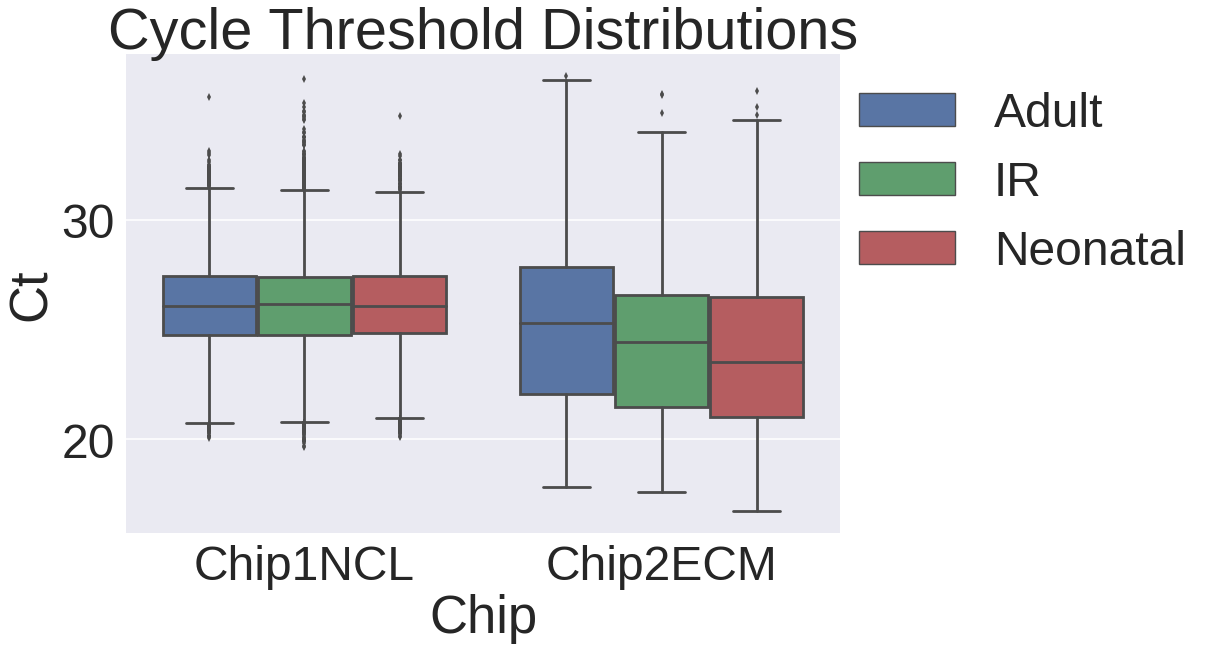

In [52]:

LOG.debug('DataFrame now looks like this:\n{}'.format(df.head()) )
df2=df.reset_index()
df3=df2.drop('level_2', axis=1)
df3.columns = ['Chip', 'CellType', 'Gene', 'Sample', 'Ct']
df4=df3.set_index(['Chip','CellType','Gene','Sample'])


# seaborn.boxplot(data=df3, x='Chip', y='Ct', hue='Chip')
seaborn.set_context(context='poster', font_scale=3)
plt.figure()
seaborn.boxplot(data=df3, x='Chip', y='Ct', hue='CellType')
plt.title('Cycle Threshold Distributions')
plt.legend(loc=(1,0.5))


# print df4nclcm'] #NID1  Tgfb_48_4  25.00158